In [ ]:
# Logistic Regression Model for Lead Conversion Prediction

In [75]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
# 2. Data Loading
data = pd.read_csv('leads.csv')  # Replace with actual file path
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
data.shape

(9240, 37)

In [9]:
# Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values)

Missing Values:
 Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to 

In [11]:
data.shape

(9240, 37)

In [ ]:
## 3. Data Exploration and Cleaning

In [ ]:
### Handling 'Lead Quality'

In [13]:
# Check correlation with 'Converted'
print(data[['Lead Quality', 'Converted']].groupby('Lead Quality').mean())

                   Converted
Lead Quality                
High in Relevance   0.946625
Low in Relevance    0.818182
Might be            0.755769
Not Sure            0.243590
Worst               0.019967


In [15]:
# Impute value as Lead Quality is correlated to lead conversion
data['Lead Quality'].fillna('Not Sure', inplace=True)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\1521050855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Lead Quality'].fillna('Not Sure', inplace=True)


In [17]:
# Dropping Asymmetrique-related columns due to high missingness
asym_cols = ['Asymmetrique Activity Index', 'Asymmetrique Profile Score',
             'Asymmetrique Activity Score', 'Asymmetrique Profile Index']
data.drop(asym_cols, axis=1, inplace=True)

In [27]:
# Impute 'Last Activity' and 'Lead Source' with mode
data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\1210897495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Last Activity'].fillna(data['Last Activity'].mode()[0], inplace=True)
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\1210897495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [ ]:
### Handling Other Missing Values

In [ ]:
# Imputing categorical columns with 'Unknown'

In [19]:
categorical_cols = ['Tags', 'Lead Profile', 'What matters most to you in choosing a course',
                    'What is your current occupation', 'Country', 'How did you hear about X Education',
                    'Specialization', 'City']

In [21]:
for col in categorical_cols:
    data[col].fillna('Unknown', inplace=True)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\3881900427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)


In [23]:
# Imputing numerical columns with median
numerical_cols = ['Page Views Per Visit', 'TotalVisits']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\166166804.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
### Dropping Columns with Excessive Nulls

In [29]:
# Checking for missing values
missing_values = data.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values)

Missing Values:
 Prospect ID                                      0
Magazine                                         0
A free copy of Mastering The Interview           0
I agree to pay the amount through cheque         0
City                                             0
Lead Profile                                     0
Get updates on DM Content                        0
Update me on Supply Chain Content                0
Lead Quality                                     0
Tags                                             0
Receive More Updates About Our Courses           0
Through Recommendations                          0
Digital Advertisement                            0
Newspaper                                        0
X Education Forums                               0
Newspaper Article                                0
Search                                           0
Lead Number                                      0
What matters most to you in choosing a course    0
What is your c

In [31]:
data.shape

(9240, 33)

In [33]:
### Removing Duplicates
data.drop_duplicates(inplace=True)

In [35]:
data.shape

(9240, 33)

In [ ]:
## 4. Exploratory Data Analysis (EDA)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\379989369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Converted', data=data, palette='viridis', ax=axes[0])


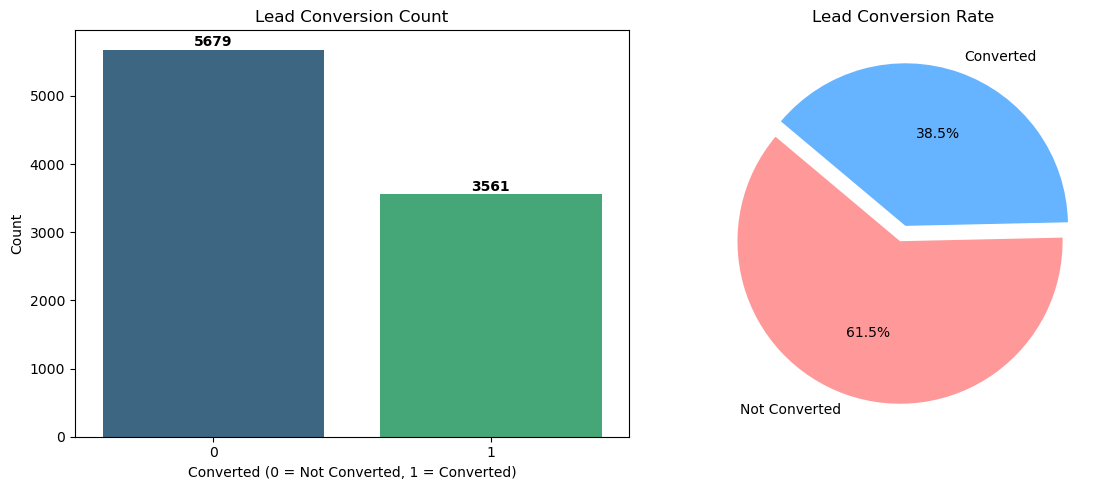

In [47]:
### Conversion Rate (Count Plot and Pie Chart Side by Side)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count Plot
sns.countplot(x='Converted', data=data, palette='viridis', ax=axes[0])
axes[0].set_title('Lead Conversion Count')
axes[0].set_xlabel('Converted (0 = Not Converted, 1 = Converted)')
axes[0].set_ylabel('Count')
for index, value in enumerate(data['Converted'].value_counts()):
    axes[0].text(index, value + 50, str(value), ha='center', fontweight='bold')

# Pie Chart
sizes = data['Converted'].value_counts()
labels = ['Not Converted', 'Converted']
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0.05)
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
axes[1].set_title('Lead Conversion Rate')

plt.tight_layout()
plt.show()

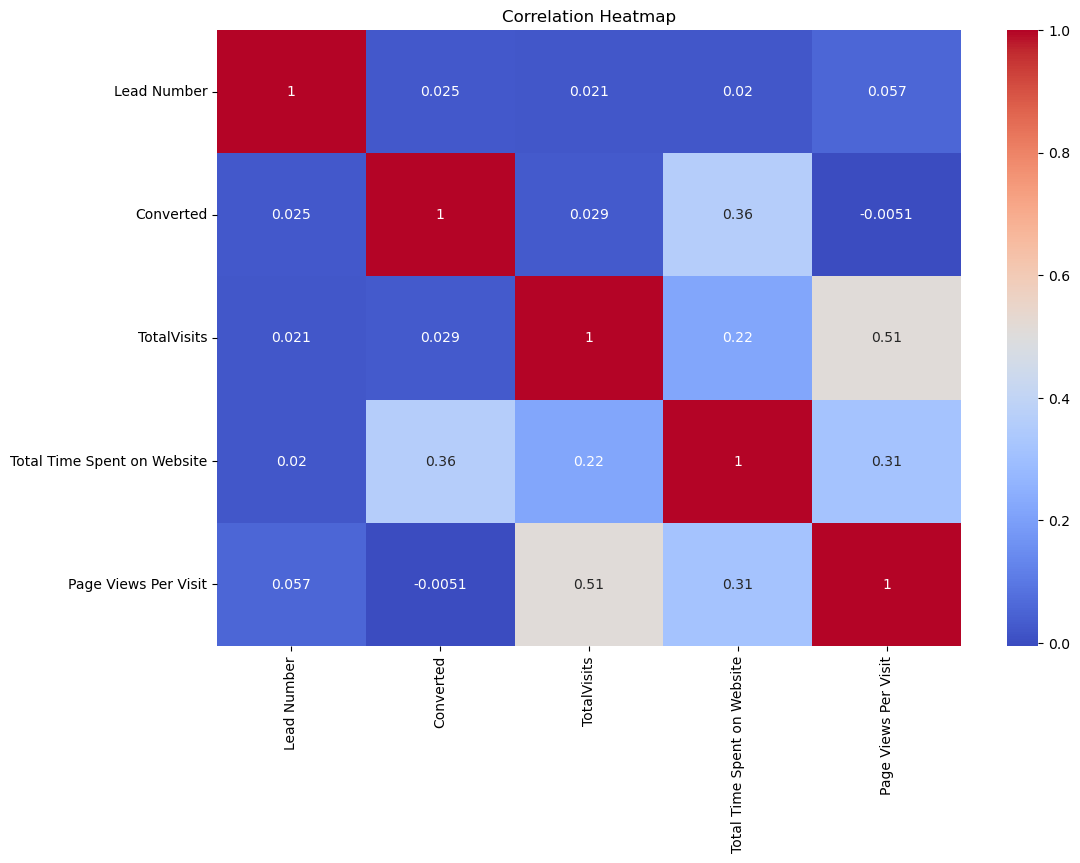

In [41]:
### Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\660342439.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\660342439.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\660342439.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\660342439.py:11: FutureWarning: 

Passing `palette

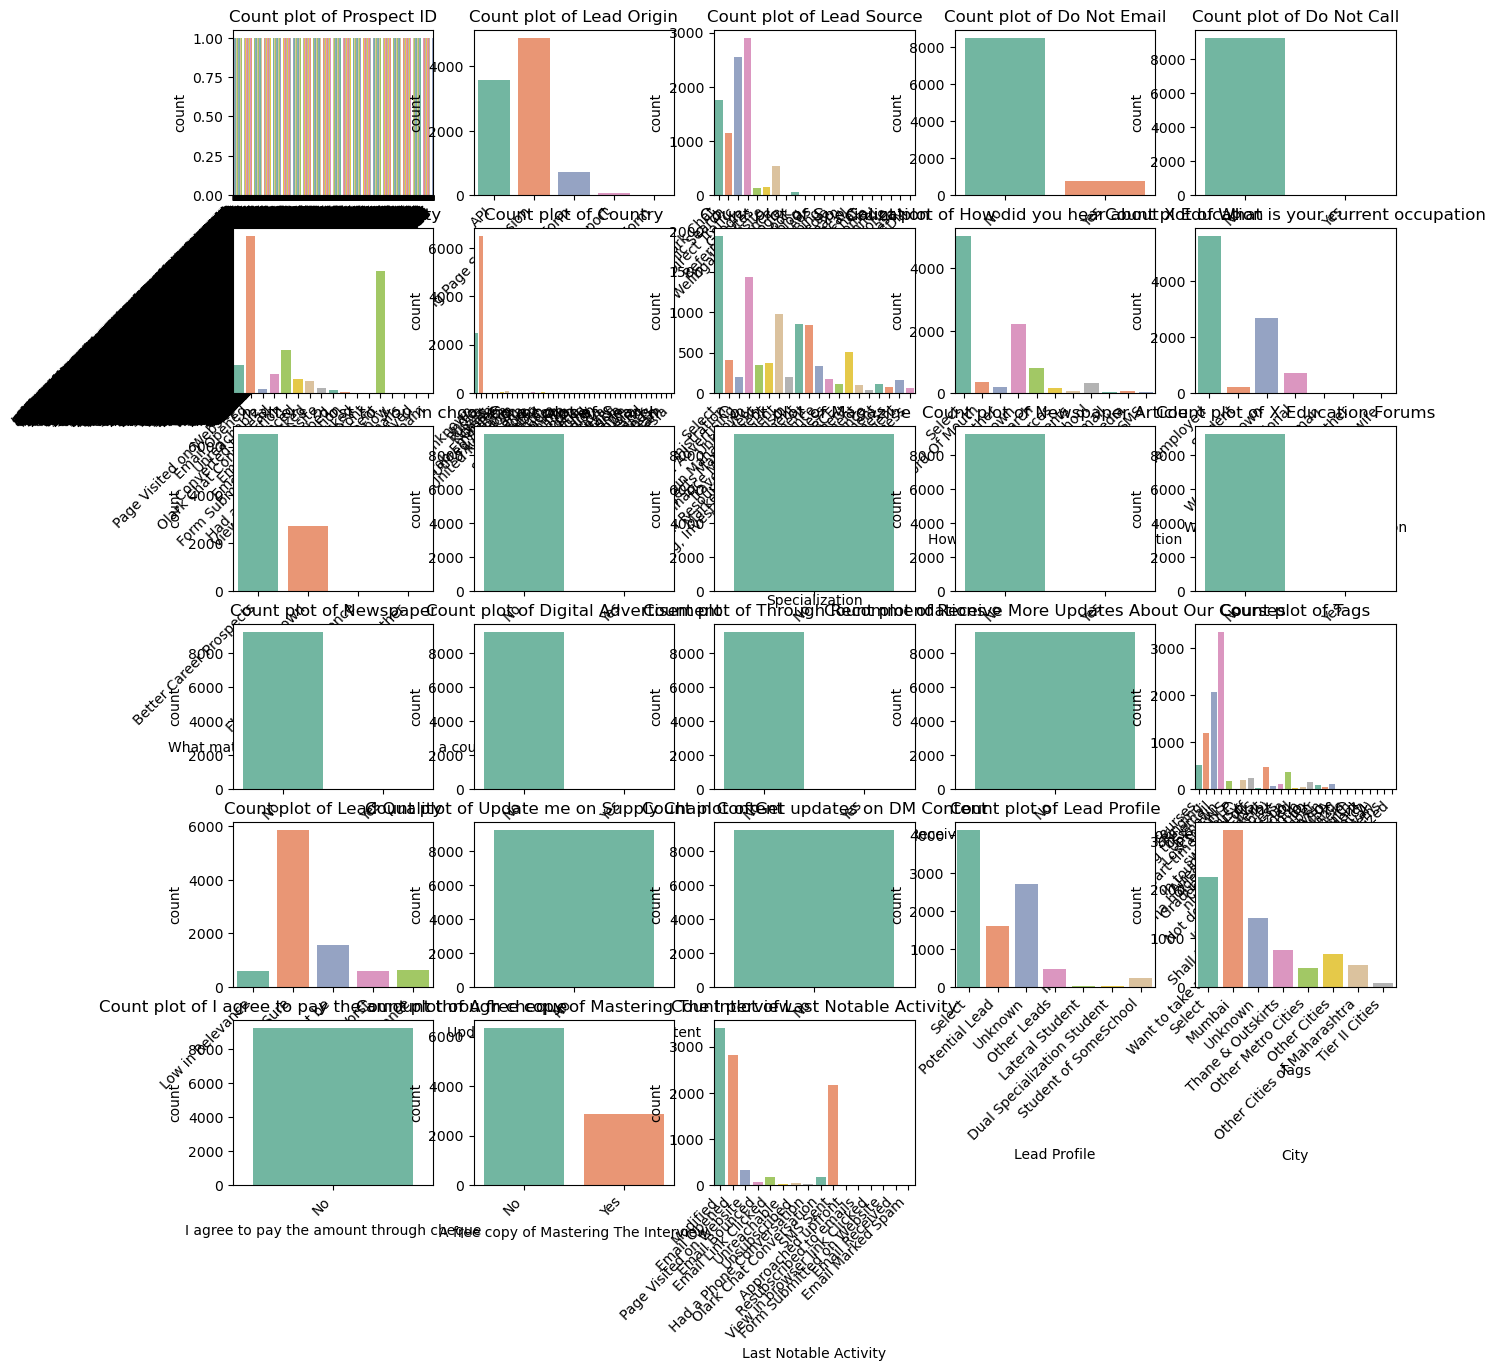

In [53]:
### Distribution of Categorical Features
# Get the categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Set the size of the plots
plt.figure(figsize=(15, 15))

# Create a subplot for each categorical column
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(6, 5, i)  # 6 rows, 5 columns
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45, ha='right')

# Adjust the layout to make space for all plots
plt.tight_layout()
plt.show()

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\3175277815.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\3175277815.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\3175277815.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_7616\3175277815.py:19: FutureWarning: 

Passing `pal

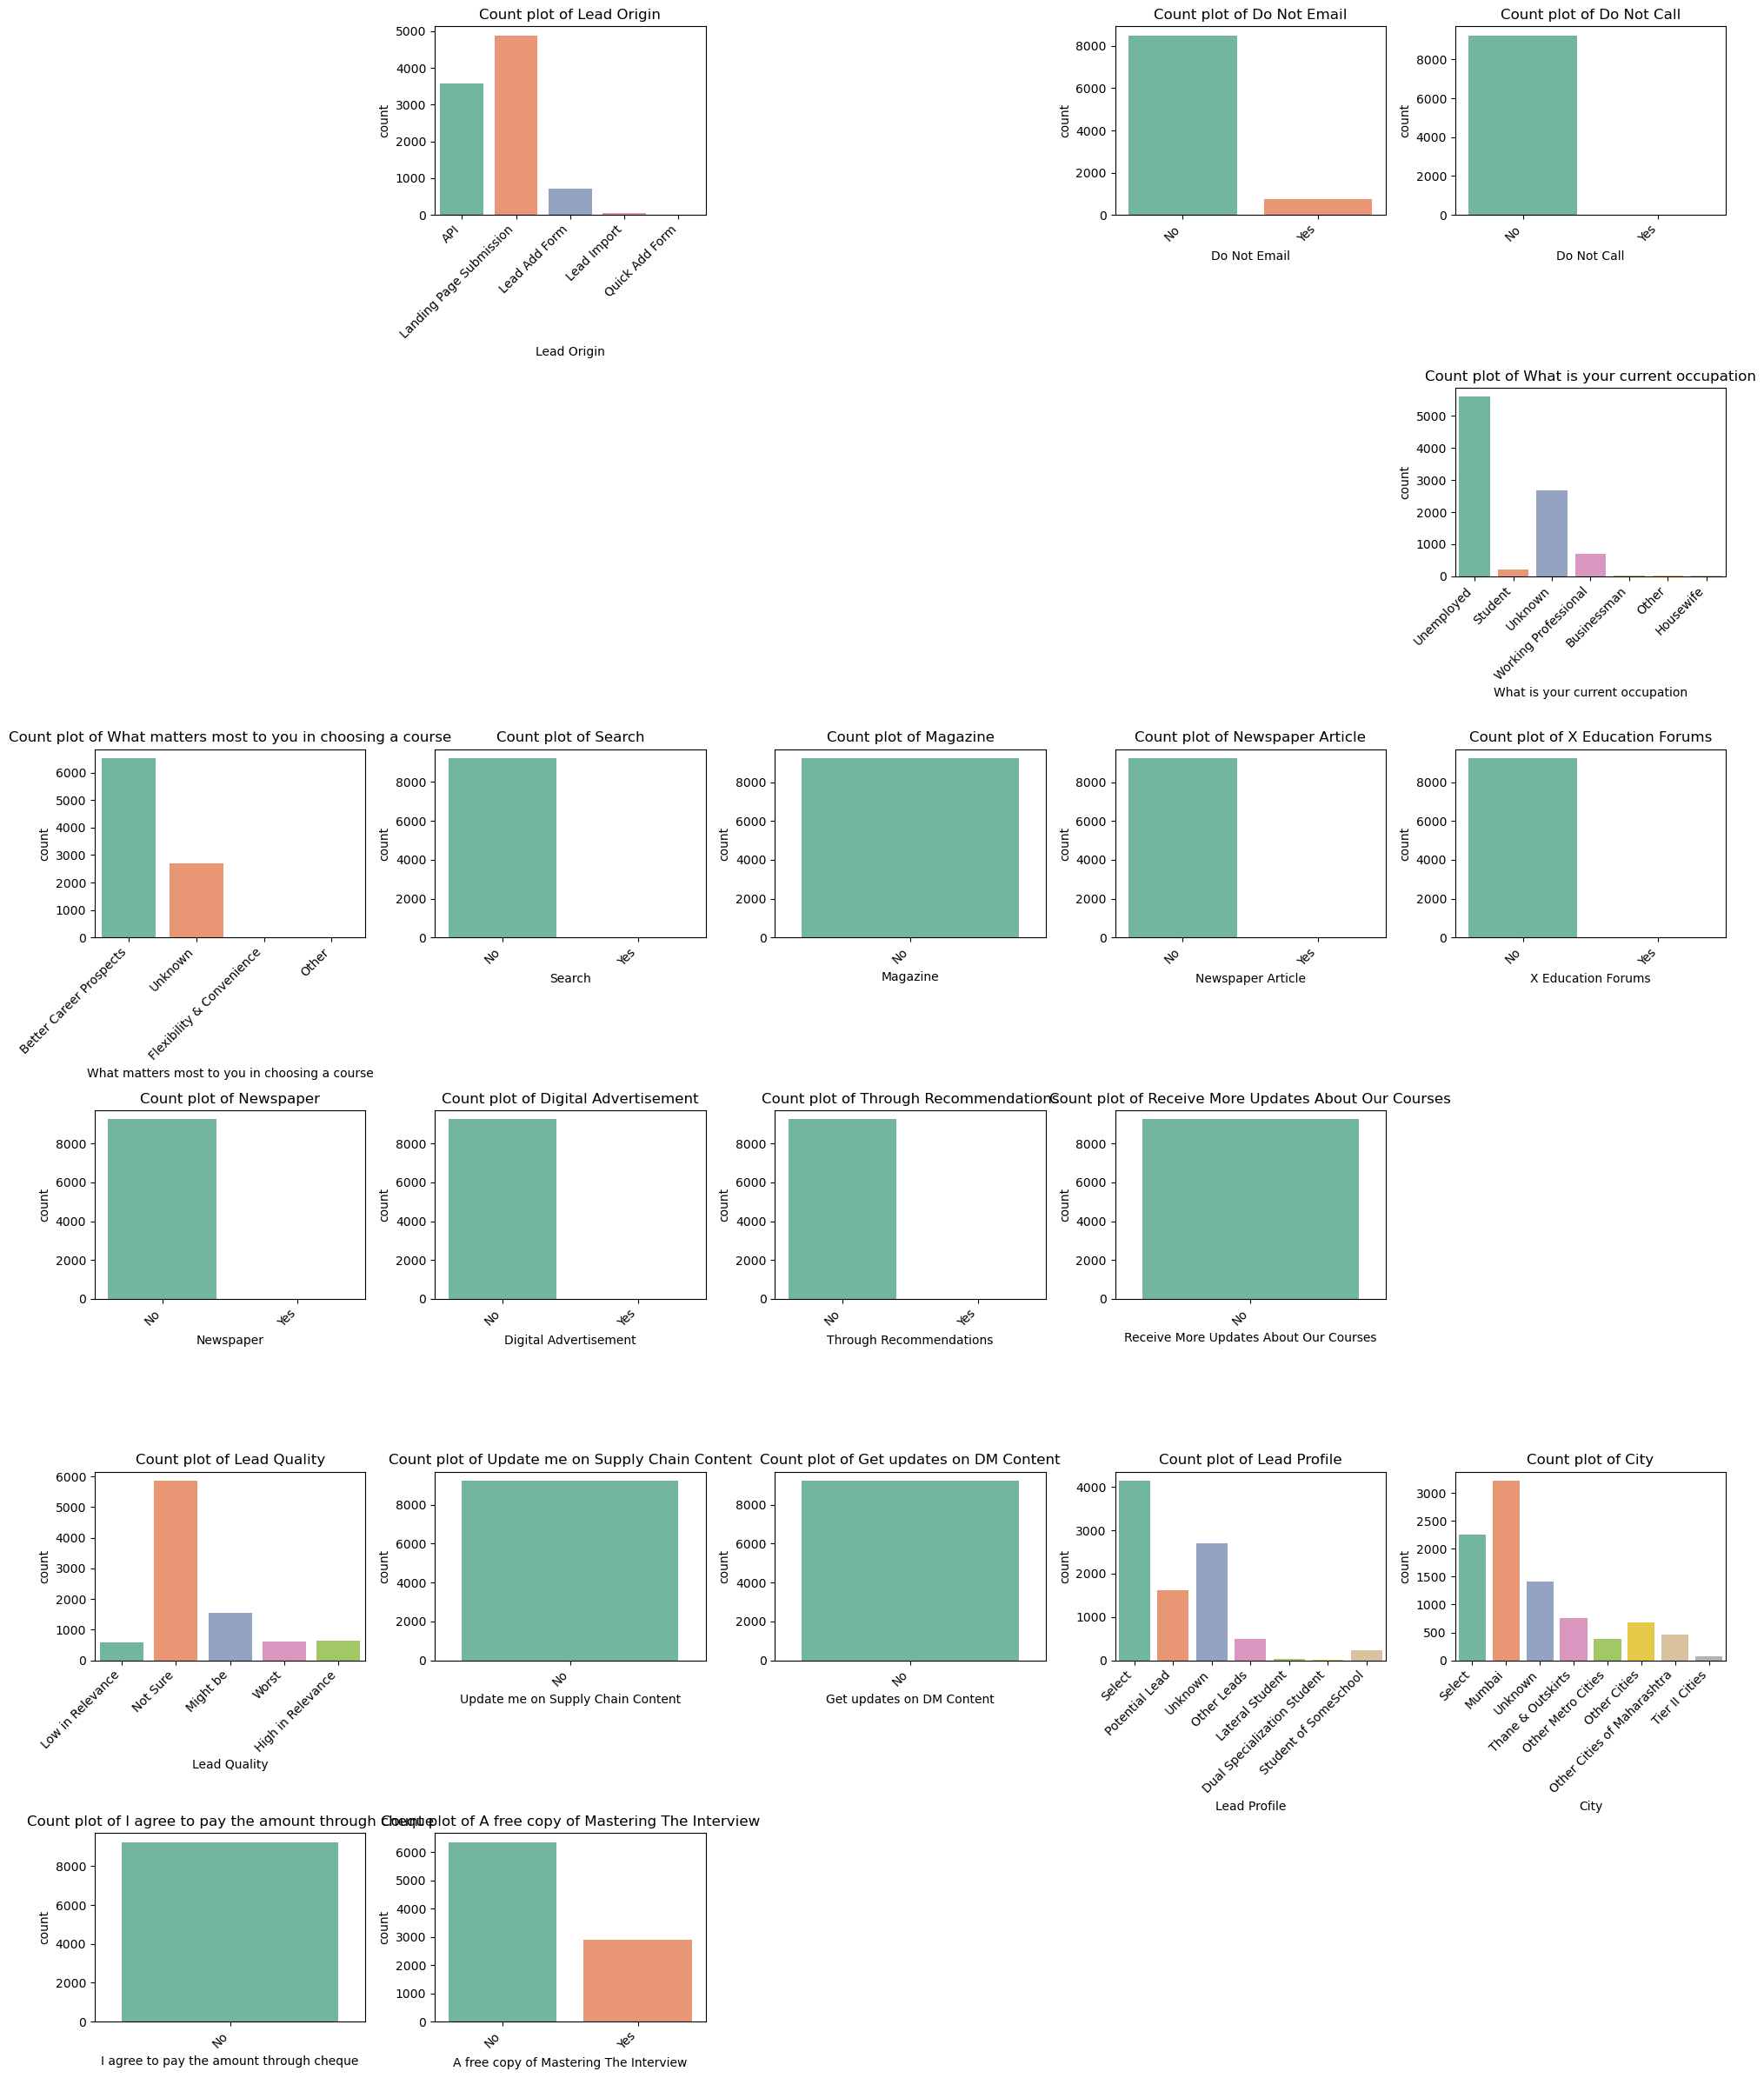

In [59]:
# Get the categorical columns
import math
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Set the number of rows and columns dynamically based on the number of categorical columns
n_cols = 5  # You can adjust this number
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Set the size of the plots
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Loop through each categorical column
for i, col in enumerate(categorical_columns, 1):
    # Count unique values, if there are too many, skip plotting
    unique_vals = data[col].nunique()
    
    if unique_vals <= 10:  # Limit to columns with <= 10 unique values
        plt.subplot(n_rows, n_cols, i)  # Adjust layout size dynamically
        sns.countplot(data=data, x=col, palette='Set2')
        plt.title(f'Count plot of {col}')
        plt.xticks(rotation=45, ha='right')

# Adjust the layout to make space for all plots
plt.tight_layout()
plt.show()

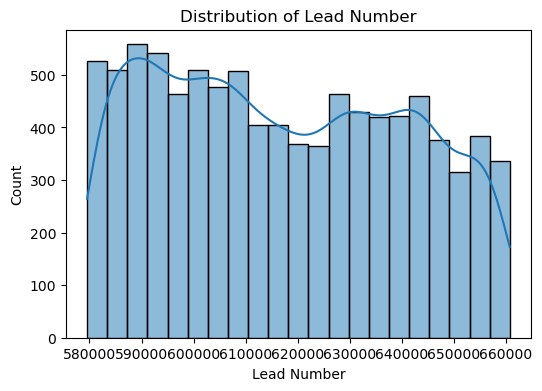

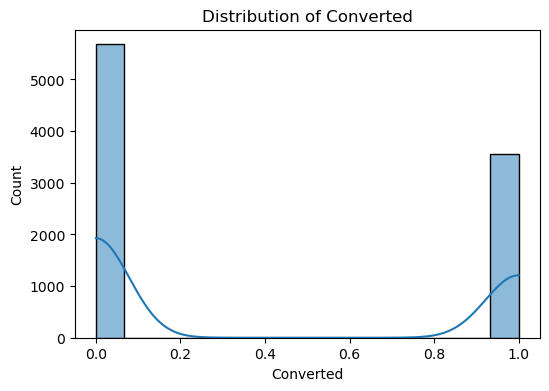

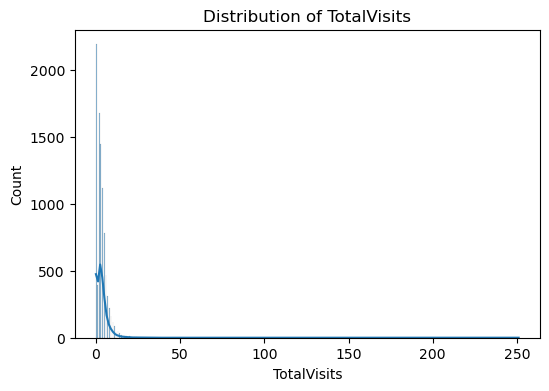

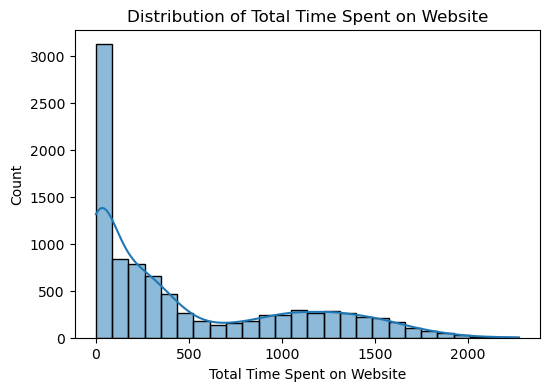

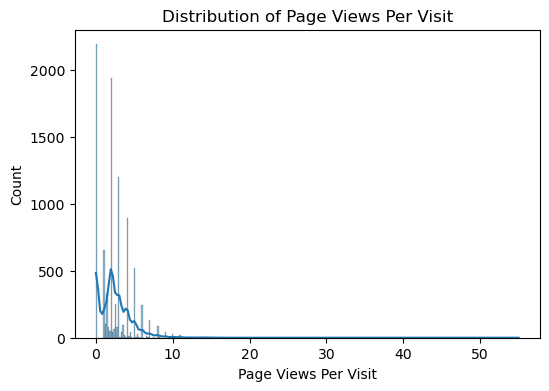

In [51]:
### Distribution of Numerical Features
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
## 5. Feature Engineering

In [61]:
### Converting Binary Variables
binary_cols = ['Do Not Email', 'Do Not Call', 'I agree to pay the amount through cheque',
               'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
               'Get updates on DM Content', 'A free copy of Mastering The Interview']

In [63]:
data[binary_cols] = data[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [65]:
### Encoding Categorical Variables
data = pd.get_dummies(data, drop_first=True)

In [67]:
# 5. Splitting Data into Train and Test Sets
cols_to_drop = ['Converted', 'Prospect ID', 'Lead Number']
existing_cols_to_drop = [col for col in cols_to_drop if col in data.columns]
X = data.drop(existing_cols_to_drop, axis=1)
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
## 6. Handling Class Imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [70]:
## 7. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
## 8. Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [ ]:
'''
# Define a smaller search space for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Smaller range for 'C'
    'penalty': ['l2'],  # Use only 'l2' penalty (skip 'l1' for simplicity)
    'solver': ['liblinear']  # Using 'liblinear' is fine for small datasets and L1 or L2 penalty
}

# Use GridSearchCV with parallel processing and 3-fold cross-validation
grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                    param_grid, cv=3, scoring='roc_auc', n_jobs=-1)  # Use all cores for parallel processing

# Fit the model with training data
grid.fit(X_train, y_train)

# Get the best model
model = grid.best_estimator_


# 8.  Model Building with Class Weighting
#model = LogisticRegression(class_weight='balanced', random_state=42)
#model.fit(X_train, y_train)


'''

In [79]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [81]:
# Adjusting threshold for better recall
threshold = 0.4
y_pred = (y_pred_prob >= threshold).astype(int)

In [83]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1571  133]
 [ 118  950]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1704
           1       0.88      0.89      0.88      1068

    accuracy                           0.91      2772
   macro avg       0.90      0.91      0.90      2772
weighted avg       0.91      0.91      0.91      2772



In [85]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9636534877178176


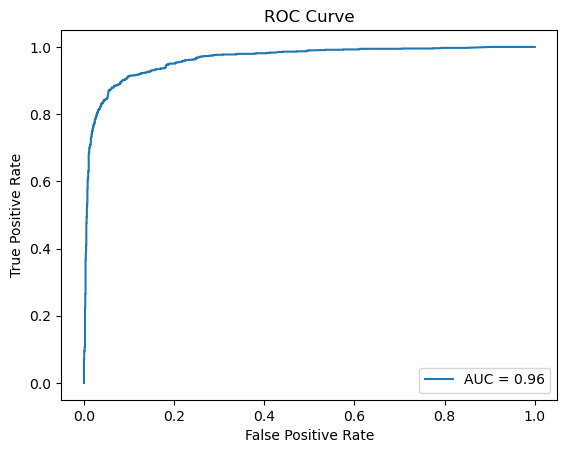

In [87]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [158]:
# Calculate Lead Scores
lead_scores = y_pred_prob * 100  # Scale probabilities to a range of 0-100

# Convert X_test back to a DataFrame
X_test_data= pd.DataFrame(X_test, columns=X.columns)  # Ensure correct column names
X_test_data['Lead Score'] = lead_scores
X_test_data['Converted'] = y_test.values  # Add the actual conversion labels for reference

In [160]:
# Display the top 10 leads with the highest scores
print("Top 10 Leads with Highest Scores:")
print(X_test_data[['Lead Score', 'Converted']].sort_values(by='Lead Score', ascending=False).head(10))

Top 10 Leads with Highest Scores:
      Lead Score  Converted
2407   99.999973          1
904    99.999961          1
1581   99.999890          1
2555   99.999859          1
797    99.999859          1
1167   99.999851          1
192    99.999851          1
80     99.999837          1
1779   99.999837          1
138    99.999837          1


In [190]:
X_test_data

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Score,Converted
0,-0.268609,-0.015863,-0.688506,-0.941035,-1.092828,0.0,0.0,0.0,0.0,-0.615639,...,-0.750205,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,0.244848,0
1,-0.268609,-0.015863,-0.281255,0.958491,-0.164481,0.0,0.0,0.0,0.0,-0.615639,...,-0.750205,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,99.939694,1
2,-0.268609,-0.015863,3.384003,-0.647843,1.228040,0.0,0.0,0.0,0.0,1.624329,...,-0.750205,-0.133887,-0.198372,0.0,1.509869,-0.069302,-0.072,0.0,25.589886,0
3,-0.268609,-0.015863,-0.484881,-0.104106,-0.628655,0.0,0.0,0.0,0.0,-0.615639,...,1.332969,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,0.012383,0
4,-0.268609,-0.015863,-0.484881,-0.937481,-0.628655,0.0,0.0,0.0,0.0,1.624329,...,1.332969,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,0.002268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,-0.268609,-0.015863,-0.688506,-0.941035,-1.092828,0.0,0.0,0.0,0.0,-0.615639,...,1.332969,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,99.982767,1
2768,-0.268609,-0.015863,0.736872,-0.573212,0.531780,0.0,0.0,0.0,0.0,-0.615639,...,-0.750205,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,0.286060,0
2769,-0.268609,-0.015863,-0.281255,-0.427505,-0.164481,0.0,0.0,0.0,0.0,-0.615639,...,-0.750205,-0.133887,-0.198372,0.0,1.509869,-0.069302,-0.072,0.0,23.419749,0
2770,-0.268609,-0.015863,-0.688506,-0.941035,-1.092828,0.0,0.0,0.0,0.0,-0.615639,...,-0.750205,-0.133887,-0.198372,0.0,-0.662309,-0.069302,-0.072,0.0,99.836691,1


In [ ]:
## 11. Answering Case Study Questions

In [115]:
### 1. Top Three Variables Contributing to Lead Conversion
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("Top 3 Contributing Variables:")
print(coefficients.head(3))

Top 3 Contributing Variables:
                                       Feature  Coefficient  \
9384                              Tags_Ringing    -1.713483   
9390  Tags_Will revert after reading the email     1.586093   
3                  Total Time Spent on Website     1.350468   

      Absolute_Coefficient  
9384              1.713483  
9390              1.586093  
3                 1.350468  


In [117]:
### 2. Top 3 Categorical/Dummy Variables to Focus On
categorical_features = [col for col in X.columns if '_' in col or col in binary_cols]
categorical_coefficients = coefficients[coefficients['Feature'].isin(categorical_features)]
categorical_coefficients = categorical_coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("Top 3 Categorical/Dummy Variables:")
print(categorical_coefficients.head(3))

Top 3 Categorical/Dummy Variables:
                                       Feature  Coefficient  \
9384                              Tags_Ringing    -1.713483   
9390  Tags_Will revert after reading the email     1.586093   
9380                         Tags_Lost to EINS     0.932813   

      Absolute_Coefficient  
9384              1.713483  
9390              1.586093  
9380              0.932813  


In [144]:
### 3. Strategy for Aggressive Lead Conversion
# Adjusting threshold to 0.3 for aggressive conversion
aggressive_threshold = 0.3
y_aggressive_pred = (y_pred_prob >= aggressive_threshold).astype(int)
print("Number of Leads Targeted with Threshold 0.3:", sum(y_aggressive_pred))

Number of Leads Targeted with Threshold 0.3: 1123


In [166]:
### 4. Strategy for Minimizing Useless Phone Calls
# Adjusting threshold to 0.8 for minimizing unnecessary calls
minimal_calls_threshold = 0.7
y_minimal_calls_pred = (y_pred_prob >= minimal_calls_threshold).astype(int)
print("Number of Leads Targeted with Threshold 0.7:", sum(y_minimal_calls_pred))

Number of Leads Targeted with Threshold 0.7: 967


## Recommendations

•Continuous Monitoring: Regularly evaluate the model’s performance and recalibrate thresholds based on seasonal trends or campaign goals.


•Targeted Interventions: Invest in understanding and addressing reasons behind negative impact variables (e.g., Tags_Ringing).


•Data-Driven Decisions: Use insights from the model to inform marketing strategies, such as prioritizing website engagement initiatives.